In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset into a dataframe

df = pd.read_excel("Coffee Shop Sales.xlsx")

In [3]:
# understanding the dataset

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
# checking if there are any missing values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
# adding columns

df['total_sale'] = df['transaction_qty'] * df['unit_price']
df['month'] = df['transaction_date'].dt.month_name()
df['day'] = df['transaction_date'].dt.day_name()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  total_sale        149116 non-null  float64       
 12  month             149116 non-null  object        
 13  day               149116 non-null  object        
dtypes: d

In [9]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sale,month,day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,Sunday


In [10]:
# reordered columns

df = df.iloc[:,[0,1,2,13,12,3,4,5,6,8,9,10,7,11]]
df.head()

,transaction_id,transaction_date,transaction_time,day,month,transaction_qty,store_id,store_location,product_id,product_category,product_type,product_detail,unit_price,total_sale
0,1,2023-01-01,07:06:11,Sunday,January,2,5,Lower Manhattan,32,Coffee,Gourmet brewed coffee,Ethiopia Rg,3.0,6.0
1,2,2023-01-01,07:08:56,Sunday,January,2,5,Lower Manhattan,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,3.1,6.2
2,3,2023-01-01,07:14:04,Sunday,January,2,5,Lower Manhattan,59,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.5,9.0
3,4,2023-01-01,07:20:24,Sunday,January,1,5,Lower Manhattan,22,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2.0
4,5,2023-01-01,07:22:41,Sunday,January,2,5,Lower Manhattan,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,3.1,6.2


In [11]:
# Analysis

# What store sells the most?

df.groupby('store_location')['total_sale'].sum().sort_values(ascending=False)

store_location
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: total_sale, dtype: float64

In [12]:
# What are the top 5 products being sold?

df.groupby('product_detail')['total_sale'].sum().sort_values(ascending=False).nlargest(5)

product_detail
Sustainably Grown Organic Lg    21151.75
Dark chocolate Lg               21006.00
Latte Rg                        19112.25
Cappuccino Lg                   17641.75
Morning Sunrise Chai Lg         17384.00
Name: total_sale, dtype: float64

In [13]:
# How many transactions did we make in each work day?

df.groupby('day')['total_sale'].count()

day
Friday       21701
Monday       21643
Saturday     20510
Sunday       21096
Thursday     21654
Tuesday      21202
Wednesday    21310
Name: total_sale, dtype: int64

In [14]:
# On January, how much did we sell for each category in Astoria?

df[(df['store_location'] == 'Astoria') & (df['month'] == 'January')].groupby('product_category')['total_sale'].sum().sort_values(ascending=False)

product_category
Coffee                10386.80
Tea                    7827.95
Drinking Chocolate     3110.25
Bakery                 3102.50
Coffee beans           1261.30
Branded                 858.00
Loose Tea               395.95
Flavours                216.80
Packaged Chocolate      154.11
Name: total_sale, dtype: float64

Text(0.5, 0, 'Product Categories')

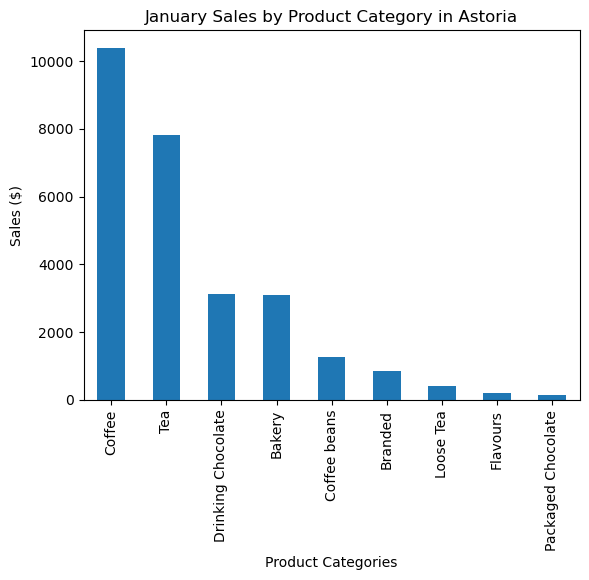

In [15]:
# visualization of previous question

df[(df['store_location'] == 'Astoria') & (df['month'] == 'January')].groupby('product_category')['total_sale'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('January Sales by Product Category in Astoria')
plt.ylabel('Sales ($)')
plt.xlabel('Product Categories')